# Dataset: Amazon Top 50 Bestselling books (2009-2019)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Description 

In [2]:
#reading the dataset
df=pd.read_csv(r"C:\Users\belin\Downloads\bestsellers with categories.csv")

In [3]:
#taking a look at the dimension of the data
df


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [7]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

# Data Cleaning

In [8]:
#checking for missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [9]:
#the data has no missing values

In [10]:
#changing data type of Genre
df.Genre = df.Genre.astype('category')

In [11]:
#dealing with duplicates in names of books column
df.duplicated(subset=['Name']).sum()


199

In [12]:
#display duplicates
display(df[df['Name'].duplicated() == True].sort_values(by=['Name']))

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction


In [13]:
#dropping duplicates but leaving only the latest entries
df=df.drop_duplicates(subset='Name',keep = 'last',inplace = False)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [14]:
#let's see if there are any more duplicates in the names of books
df.duplicated(subset=['Name']).sum()

0

In [15]:
#checking for and replacing misspelt Author names
authors = df['Author'].sort_values().unique()
df = df.replace('George R. R. Martin', 'George R.R. Martin')
data = df.replace('J. K. Rowling', 'J.K. Rowling')

In [16]:
#checking for duplicates in name column
df.duplicated('Name').sum()

0

In [17]:
#checking the remaining columns:
#year
years = list(df.Year.unique())
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [18]:
#genre
genre = df.Genre.unique()
genre

['Non Fiction', 'Fiction']
Categories (2, object): ['Non Fiction', 'Fiction']

In [19]:
df['Genre'].value_counts()

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

In [20]:
df.shape

(351, 7)

# EXPLORATORY DATA ANALYSIS

### Getting Some Insights

In [21]:
#top five books with the highest price
df[['Name','Author','Price','Genre']].sort_values(by='Price',ascending=False).head(5)

,Name,Author,Price,Genre
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,82,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,54,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,53,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,52,Fiction


In [22]:
#top 5 authors with the highest user ratings
df[['Author','User Rating']].sort_values(by='User Rating', ascending=False).head()



,Author,User Rating
82,Dav Pilkey,4.9
174,Brandon Stanton,4.9
147,Sherri Duskey Rinker,4.9
289,Rush Limbaugh,4.9
41,Bill Martin Jr.,4.9


In [23]:
#top five books with the highest user rating
df[['User Rating','Name','Author','Genre','Price']].sort_values(by='User Rating',ascending=False).head()


,User Rating,Name,Author,Genre,Price
82,4.9,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,Fiction,8
174,4.9,Humans of New York : Stories,Brandon Stanton,Non Fiction,17
147,4.9,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,7
289,4.9,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,Fiction,12
41,4.9,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,5


In [24]:
#top five books with the lowest ratings
df[['User Rating','Name','Author','Genre','Price']].sort_values(by='User Rating').head()

,User Rating,Name,Author,Genre,Price
353,3.3,The Casual Vacancy,J.K. Rowling,Fiction,12
132,3.6,Go Set a Watchman: A Novel,Harper Lee,Fiction,19
107,3.8,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,14
22,3.9,Allegiant,Veronica Roth,Fiction,13
393,3.9,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,Fiction,20


In [25]:
#top five books with the highest reviews

df[['User Rating','Name','Author','Genre','Price','Reviews']].sort_values(by='Reviews',ascending=False).head()

,User Rating,Name,Author,Genre,Price,Reviews
534,4.8,Where the Crawdads Sing,Delia Owens,Fiction,15,87841
383,4.1,The Girl on the Train,Paula Hawkins,Fiction,7,79446
33,4.8,Becoming,Michelle Obama,Non Fiction,11,61133
137,4.0,Gone Girl,Gillian Flynn,Fiction,9,57271
368,4.7,The Fault in Our Stars,John Green,Fiction,13,50482


In [26]:
#top 5 authors with the most books
df.groupby('Author')[['Name']].count().sort_values('Name', ascending=False).head(5)

,Name
Author,
Jeff Kinney,12
Rick Riordan,10
Stephenie Meyer,7
J.K. Rowling,6
Bill O'Reilly,6


### Visualisations

Text(0.5, 1.0, 'Distribution of Genre')

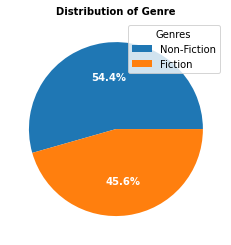

In [27]:
#count of fiction against non-fiction amongst betsellers
plt.pie(x=df['Genre'].value_counts(),autopct='%1.1f%%',textprops=dict(color='w',fontweight='bold',fontsize=10))
plt.legend(['Non-Fiction','Fiction'],title='Genres',loc='upper right')
plt.title("Distribution of Genre",fontsize=10,fontweight='bold')
         


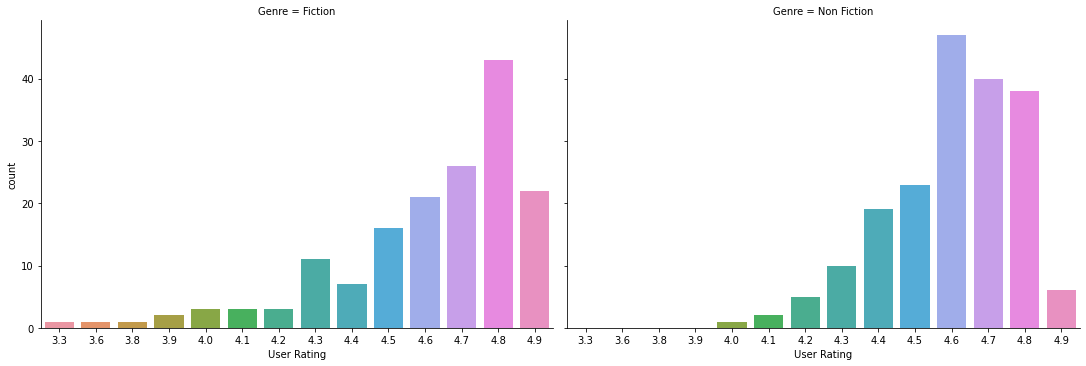

In [28]:
#count of user rating amongst genre
sns.catplot(x='User Rating',kind='count',data=df,col='Genre',aspect=1.5)

Text(0.5, 1.0, 'Top 5 Authors')

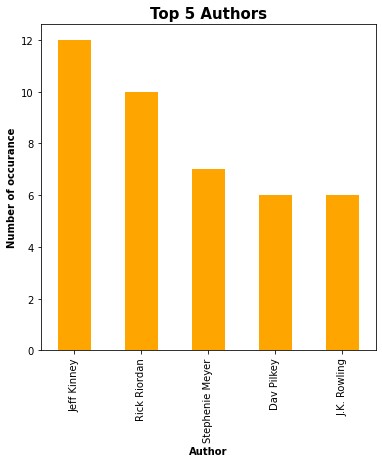

In [29]:
#count of books for the top 5 Authors
top_authors=df['Author'].value_counts().sort_values(ascending=False).head(5)
top_authors.plot(kind='bar',color='orange',figsize=(6,6))

plt.ylabel("Number of occurance",fontsize=10,fontweight='bold')
plt.xlabel("Author",fontsize=10,fontweight='bold')
plt.title("Top 5 Authors",fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'Top 10 Books With Maximum Reviews')

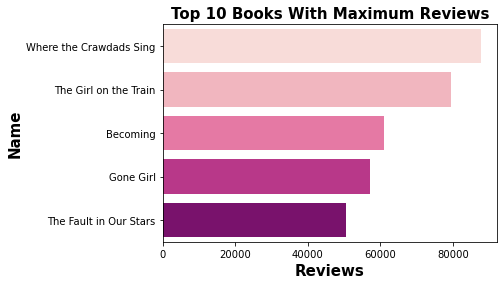

In [30]:
#top 5 authors with the most reviews
top5_rev=df.sort_values('Reviews',ascending=False).head(5)
sns.barplot(x='Reviews',y='Name',data=top5_rev,palette='RdPu')

plt.xlabel("Reviews",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Books With Maximum Reviews",fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'Top 5 Name With the Lowest Ratings')

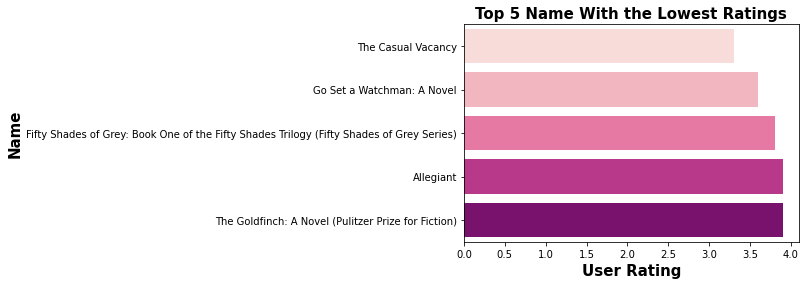

In [31]:
#books with low user ratings
low5_ur=df.sort_values('User Rating',ascending=True).head(5)
sns.barplot(x='User Rating',y='Name',data=low5_ur,palette='RdPu')

plt.xlabel("User Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 5 Name With the Lowest Ratings",fontsize=15,fontweight='bold')

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

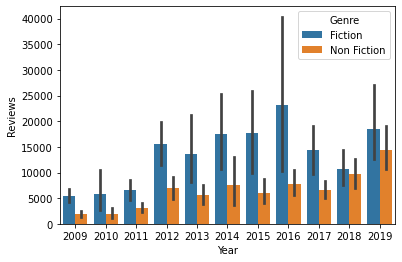

In [32]:
#number of reviews by year per genre
sns.barplot(x='Year',y='Reviews',data=df,hue='Genre')

<AxesSubplot:xlabel='Year', ylabel='Price'>

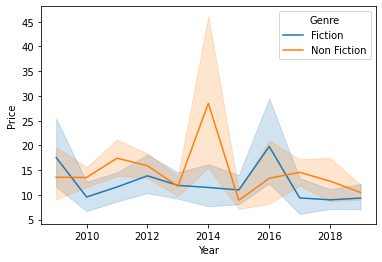

In [33]:
#Price by year per genre
sns.lineplot(x='Year',y='Price',data=df,hue='Genre')

<AxesSubplot:>

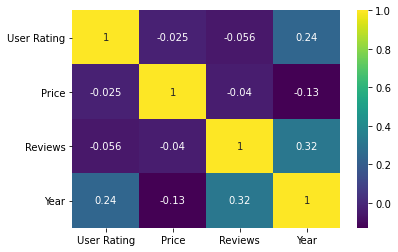

In [34]:
#correlation between numerical variables
sns.heatmap(data = df.loc[:, ['User Rating','Price','Reviews','Year']].corr(),cmap = 'viridis', annot = True)